In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]



loo = LeaveOneOut()
loo_scores = [] 

## Splitting & Using SVM


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_classifier = SVC(kernel='linear')  

svm_classifier.fit(X_train, y_train)
test_score = svm_classifier.score(X_test, y_test)
y_pred = svm_classifier.predict(X_test)



In [5]:
# from sklearn.model_selection import cross_val_predict, KFold

# num_folds = 5
# svm_classifier = SVC(kernel='linear')
# kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# y_pred = cross_val_predict(svm_classifier, X, y, cv=kf)


## Using Evaluation Metrics

Accuracy =  87.32394366197182 %
Precision =  0.755331088664422
Recall =  0.7462732128680404
F1-score =  0.7490966599048879


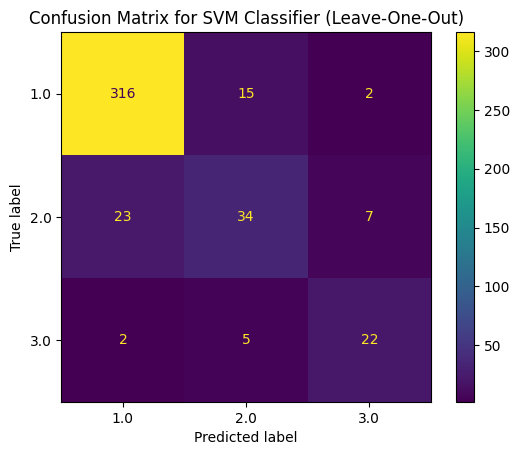

Classification Report
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       333
         2.0       0.63      0.53      0.58        64
         3.0       0.71      0.76      0.73        29

    accuracy                           0.87       426
   macro avg       0.76      0.75      0.75       426
weighted avg       0.87      0.87      0.87       426



In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='macro'))
print("Recall = ", recall_score(y_test, y_pred,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred,average='macro'))
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for SVM Classifier (Leave-One-Out)')
plt.show()
# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



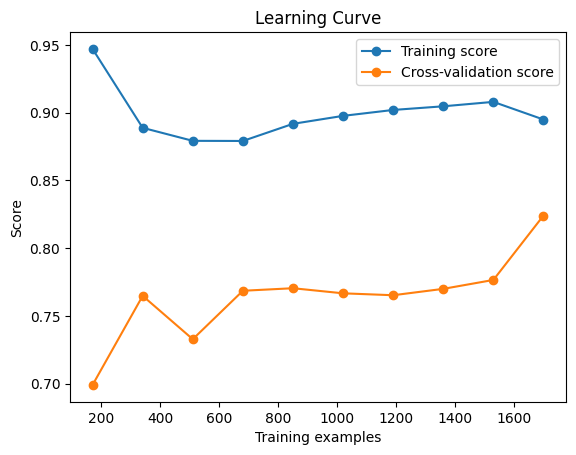

In [7]:
train_sizes, train_scores, test_scores = learning_curve(svm_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

Top Feature Indices:
Feature Index 2
Feature Index 8
Feature Index 1
Feature Index 3
Feature Index 15
Feature Index 20


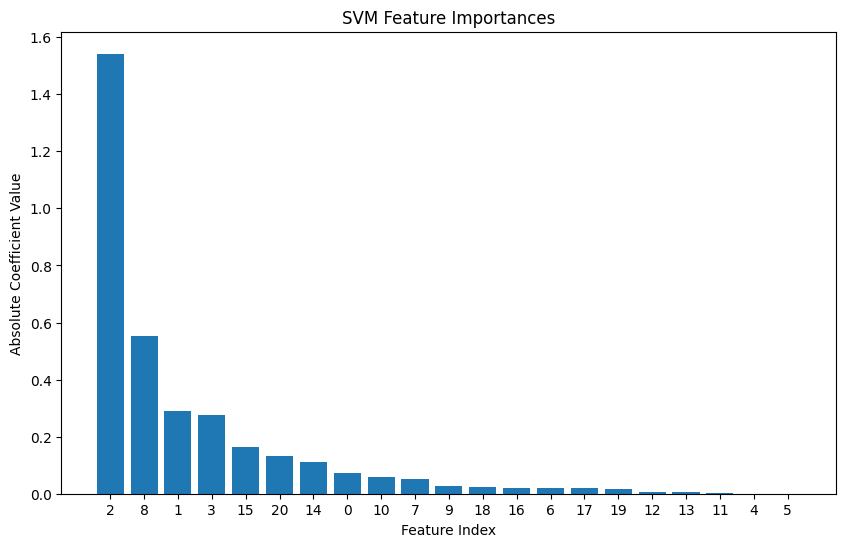

In [8]:
coefficients = svm_classifier.coef_[0]

sorted_indices = np.argsort(np.abs(coefficients))[::-1]

print("Top Feature Indices:")
for idx in sorted_indices[:6]: 
    print(f"Feature Index {idx}")

plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), np.abs(coefficients[sorted_indices]), tick_label=sorted_indices)
plt.xlabel('Feature Index')
plt.ylabel('Absolute Coefficient Value')
plt.title('SVM Feature Importances')
plt.show()


In [9]:
top_k_features_indices = sorted_indices[:10]
print("Indices of Important Features:", top_k_features_indices)

X_selected = X.iloc[:, top_k_features_indices]


print("Adjusted X based on Important Features:")
print(X_selected)


Indices of Important Features: [ 2  8  1  3 15 20 14  0 10  7]
Adjusted X based on Important Features:
      fetal_movement  mean_value_of_short_term_variability  accelerations  \
0              0.000                                   0.5          0.000   
1              0.000                                   2.1          0.006   
2              0.000                                   2.1          0.003   
3              0.000                                   2.4          0.003   
4              0.000                                   2.4          0.007   
...              ...                                   ...            ...   
2121           0.000                                   0.2          0.000   
2122           0.000                                   0.4          0.001   
2123           0.000                                   0.4          0.001   
2124           0.000                                   0.4          0.001   
2125           0.002                              

## Checking class distribution

Class Distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64
Coefficient of Variation (CV): 1.1595095195631708


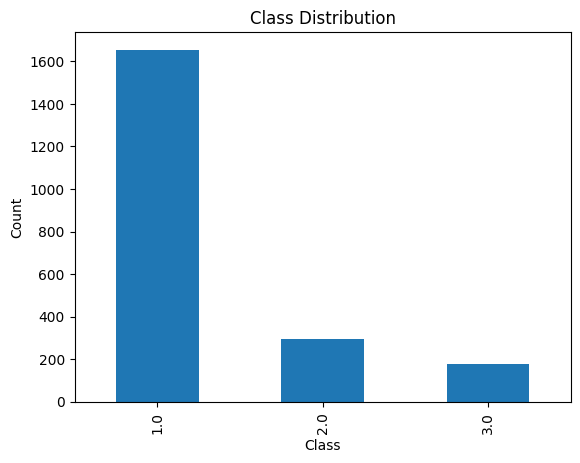

In [10]:

target_column = 'fetal_health'

class_distribution = df[target_column].value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Applying SMOTE


In [11]:
# scaler = MinMaxScaler()
# X_train_normalized = scaler.fit_transform(X_train)
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# y_resampled_int = y_resampled.astype(int)

print("Feature names during training:", X_resampled.columns)
print("Feature names in the test set:", X_test.columns)
X_test_aligned = X_test[X_resampled.columns]


Feature names during training: Index(['fetal_movement', 'mean_value_of_short_term_variability',
       'accelerations', 'uterine_contractions', 'histogram_number_of_zeroes',
       'histogram_tendency', 'histogram_number_of_peaks', 'baseline value',
       'mean_value_of_long_term_variability',
       'abnormal_short_term_variability'],
      dtype='object')
Feature names in the test set: Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dt

Class Distribution:
fetal_health
2.0    1655
1.0    1655
3.0    1655
Name: count, dtype: int64
Coefficient of Variation (CV): 0.0


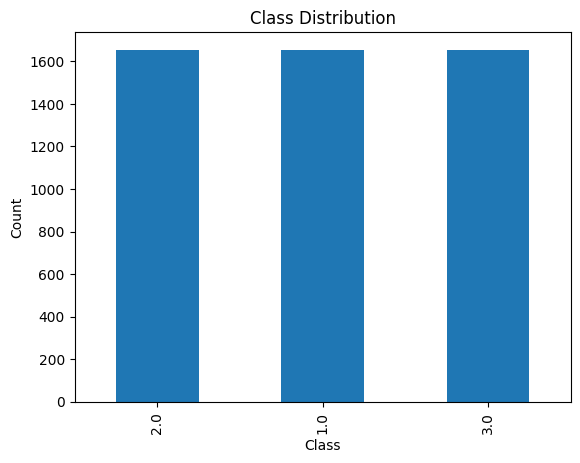

In [12]:

y_resampled_series = pd.Series(y_resampled)

class_distribution = y_resampled_series.value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Using SVM

In [13]:

from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


svm_after_smote = SVC(kernel='linear', random_state=42)


svm_after_smote.fit(X_resampled, y_resampled)

y_pred_full = svm_after_smote.predict(X_resampled)
y_pred_test = svm_after_smote.predict(X_test_aligned)



Holdout CV : 0.8247058823529412
k-Fold CV : 0.8207825354346318
Stratified k-Fold CV: 0.8221931948515355


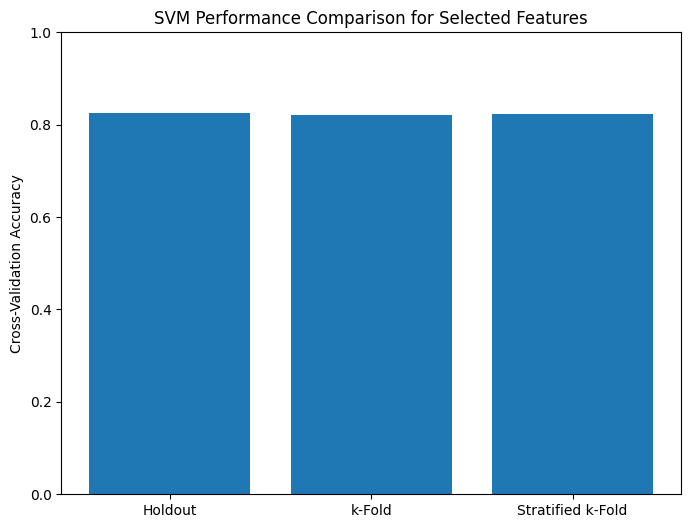

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, LeaveOneOut, StratifiedKFold, KFold
from sklearn.svm import SVC

cv_scores_holdout = []
cv_scores_leave_one_out = []
cv_scores_kfold = []
cv_scores_stratified_kfold = []

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
svm_classifier = SVC(kernel='linear')  # Linear kernel by default
svm_classifier.fit(X_train, y_train)

# Cross-validation
scores_holdout = cross_val_score(svm_classifier, X_train, y_train, cv=2, scoring='accuracy')
cv_scores_holdout.append(scores_holdout.mean())
print(f'Holdout CV : {scores_holdout.mean()}')

# loo = LeaveOneOut()
# scores_leave_one_out = cross_val_score(svm_classifier, X_selected, y, cv=loo, scoring='accuracy')
# cv_scores_leave_one_out.append(scores_leave_one_out.mean())
# print(f'Leave-One-Out CV : {scores_leave_one_out.mean()}')

kf = KFold(n_splits=4, shuffle=True, random_state=42)
scores_kfold = cross_val_score(svm_classifier, X_selected, y, cv=kf, scoring='accuracy')
cv_scores_kfold.append(scores_kfold.mean())
print(f'k-Fold CV : {scores_kfold.mean()}')

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
scores_stratified_kfold = cross_val_score(svm_classifier, X_selected, y, cv=skf, scoring='accuracy')
cv_scores_stratified_kfold.append(scores_stratified_kfold.mean())
print(f'Stratified k-Fold CV: {scores_stratified_kfold.mean()}')

plt.figure(figsize=(8, 6))
plt.bar(['Holdout', 'k-Fold', 'Stratified k-Fold'],
        [cv_scores_holdout[0], cv_scores_kfold[0], cv_scores_stratified_kfold[0]])
plt.title(f'SVM Performance Comparison for Selected Features')
plt.ylabel('Cross-Validation Accuracy')
plt.ylim([0, 1])
plt.show()


## Using Evaluation Metrics

Accuracy (Resampled): 80.2416918429003 %
Precision (macro, Resampled): 0.8055116412844491
Recall (macro, Resampled): 0.8024169184290031
F1-score (macro, Resampled): 0.8011920897460247
Confusion Matrix (Resampled):


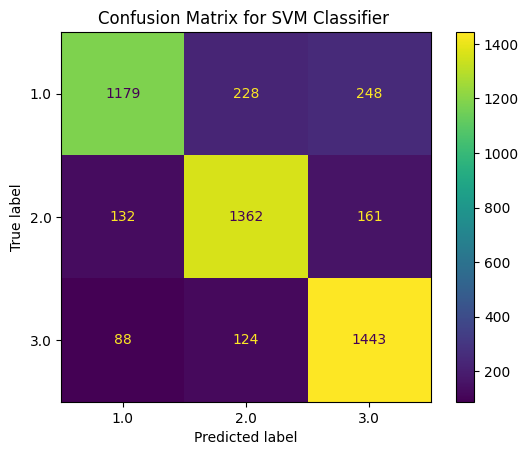

Classification Report (Resampled):
              precision    recall  f1-score   support

         1.0       0.84      0.71      0.77      1655
         2.0       0.79      0.82      0.81      1655
         3.0       0.78      0.87      0.82      1655

    accuracy                           0.80      4965
   macro avg       0.81      0.80      0.80      4965
weighted avg       0.81      0.80      0.80      4965

Test Accuracy: 69.95305164319248 %
Test Precision (macro): 0.5744618539026202
Test Recall (macro): 0.7709962117289703
Test F1-score (macro): 0.5995561556205626


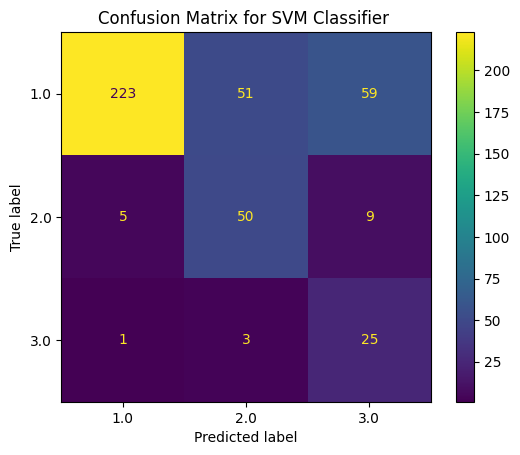

In [15]:
accuracy_resampled = accuracy_score(y_resampled, y_pred_full)
precision_resampled = precision_score(y_resampled, y_pred_full, average='macro')
recall_resampled = recall_score(y_resampled, y_pred_full, average='macro')
f1_resampled = f1_score(y_resampled, y_pred_full, average='macro')

conf_matrix_resampled = confusion_matrix(y_resampled, y_pred_full)
class_report_resampled = classification_report(y_resampled, y_pred_full)

print("Accuracy (Resampled):", accuracy_resampled * 100, "%")
print("Precision (macro, Resampled):", precision_resampled)
print("Recall (macro, Resampled):", recall_resampled)
print("F1-score (macro, Resampled):", f1_resampled)

print("Confusion Matrix (Resampled):")
conf_matrix = confusion_matrix(y_resampled, y_pred_full)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for SVM Classifier ')
plt.show()
print("Classification Report (Resampled):")
print(class_report_resampled)


test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='macro')
test_recall = recall_score(y_test, y_pred_test, average='macro')
test_f1 = f1_score(y_test, y_pred_test, average='macro')
test_conf_matrix = confusion_matrix(y_test, y_pred_test)

print("Test Accuracy:", test_accuracy * 100, "%")
print("Test Precision (macro):", test_precision)
print("Test Recall (macro):", test_recall)
print("Test F1-score (macro):", test_f1)

conf_matrix = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for SVM Classifier ')
plt.show()



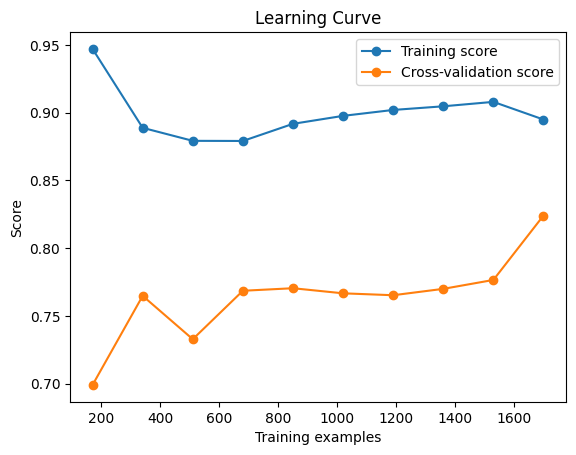

In [16]:
train_sizes, train_scores, test_scores = learning_curve(svm_after_smote, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

Top Feature Indices:
Feature Index 0
Feature Index 1
Feature Index 2
Feature Index 3
Feature Index 5
Feature Index 6


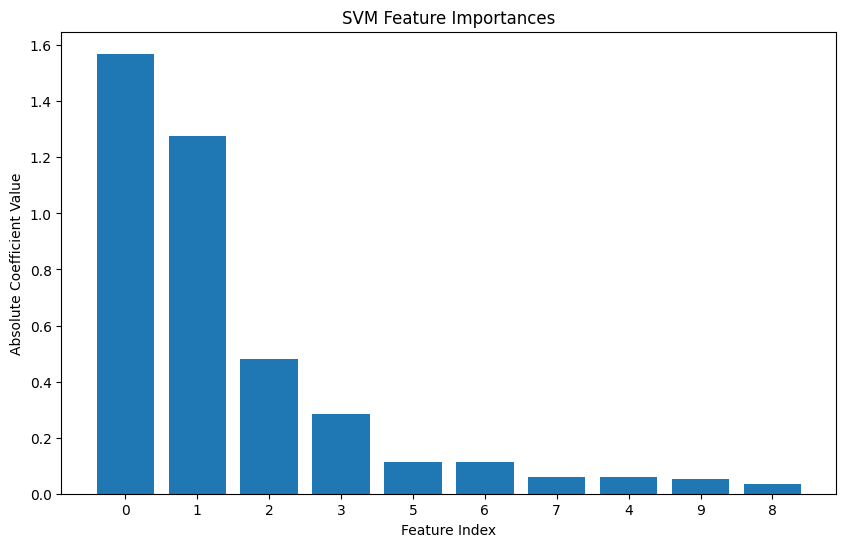

In [17]:
coefficients = svm_classifier.coef_[0]

sorted_indices = np.argsort(np.abs(coefficients))[::-1]

print("Top Feature Indices:")
for idx in sorted_indices[:6]: 
    print(f"Feature Index {idx}")

plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), np.abs(coefficients[sorted_indices]), tick_label=sorted_indices)
plt.xlabel('Feature Index')
plt.ylabel('Absolute Coefficient Value')
plt.title('SVM Feature Importances')
plt.show()
